In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
names = ['lettr','x-box','y-box','width','high','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege',\
        'xegvy','y-ege','yegvx']
df = pd.read_csv('data.txt', header=None, names=names)
print(df.head())
print('\n')
print('Data set Dimensions :',df.shape)

  lettr  x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
0     T      2      8      3     5      1      8     13      0      6      6   
1     I      5     12      3     7      2     10      5      5      4     13   
2     D      4     11      6     8      6     10      6      2      6     10   
3     N      7     11      6     6      3      5      9      4      6      4   
4     G      2      1      3     1      1      8      6      6      6      6   

   x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
0     10      8      0      8      0      8  
1      3      9      2      8      4     10  
2      3      7      3      7      3      9  
3      4     10      6     10      2      8  
4      5      9      1      7      5     10  


Data set Dimensions : (20000, 17)


In [9]:
# Converting 'object' type variable(categorical) to numeric
lookup = []
for i in df.columns:
    names = df[i]
    l = {}
   
    if df[i].dtype == 'object':
        df[i] = pd.Categorical(df[i])
        df[i] = df[i].cat.codes
        
        for x in range(len(names)):
            if names[x] not in l:
                l[names[x]] = df[i][x]
            
        lookup.append(l)
        
print('Categories and their respective values:',lookup)

Categories and their respective values: [{'T': 19, 'I': 8, 'D': 3, 'N': 13, 'G': 6, 'S': 18, 'B': 1, 'A': 0, 'J': 9, 'M': 12, 'X': 23, 'O': 14, 'R': 17, 'F': 5, 'C': 2, 'H': 7, 'W': 22, 'L': 11, 'P': 15, 'E': 4, 'V': 21, 'Y': 24, 'Q': 16, 'U': 20, 'K': 10, 'Z': 25}]


In [10]:
X = df.drop('lettr',axis=1)
print('Feature Variable Dimension:',X.shape)
y = df.lettr
print('Target Variable Dimension:',y.shape)

Feature Variable Dimension: (20000, 16)
Target Variable Dimension: (20000,)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 12)
print('X Train:',X_train.shape)
print('X Test:',X_test.shape)
print('Y Train:',Y_train.shape)
print('Y Test:',Y_test.shape)


X Train: (15000, 16)
X Test: (5000, 16)
Y Train: (15000,)
Y Test: (5000,)


<h1>KNN</h1>

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')               

knn_model = knn.fit(X_train, Y_train)
knn_predict = knn.predict(X_test)

print ('KNN Accuracy with default parameters:',metrics.accuracy_score(knn_predict, Y_test)*100,'%')

KNN Accuracy with default parameters: 95.4 %


Max Accuracy of KNN = 96.12% at K = 4


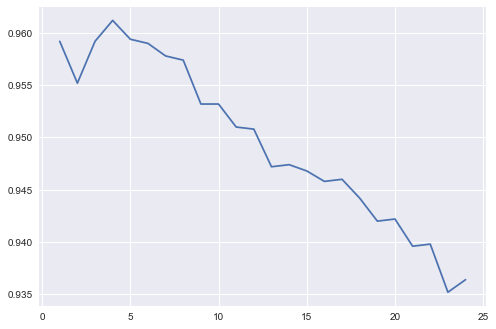

In [13]:
# Tuning available parameters for optimal results
knn_K_range = range(1,25)
acc = []
for i in knn_K_range:
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=1, weights='distance')            
    knn_model = knn.fit(X_train, Y_train)
    knn_predict = knn.predict(X_test)
    acc.append(metrics.accuracy_score(knn_predict, Y_test))

max_knn_acc = max(acc)
knn_index = acc.index(max(acc)) + 1
print('Max Accuracy of KNN = ' + str(max_knn_acc*100) + '% at K = ' + str(knn_index))

plt.plot(knn_K_range,acc)
plt.grid(True)
plt.show()

In [14]:
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=knn_index, weights='uniform')               

knn_model = knn.fit(X_train, Y_train)
knn_predict = knn.predict(X_test)

report = classification_report(Y_test, knn_predict, labels=None, target_names=None, sample_weight=None, digits=2)
print(report)


             precision    recall  f1-score   support

          0       0.99      0.99      0.99       175
          1       0.88      0.98      0.93       204
          2       0.99      0.96      0.98       200
          3       0.86      0.96      0.91       205
          4       0.89      0.99      0.94       175
          5       0.86      0.98      0.91       185
          6       0.97      0.96      0.97       187
          7       0.90      0.90      0.90       178
          8       0.94      0.97      0.95       202
          9       0.96      0.90      0.93       173
         10       0.95      0.90      0.92       200
         11       0.99      0.96      0.98       187
         12       0.99      0.98      0.98       193
         13       0.97      0.96      0.96       189
         14       0.89      0.97      0.93       183
         15       0.99      0.87      0.92       186
         16       0.97      0.94      0.96       198
         17       0.96      0.91      0.93   

In [15]:
# CROSS VALIDATION
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=knn_index, n_jobs=-1, weights='distance')
scores = cross_val_score(knn, X, y, cv=10)
print('Mean Accuracy:',np.mean(scores)*100,'%')

Mean Accuracy: 96.0601629298 %


<h1>Extra Trees Classifier</h1>

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators= 10, random_state=10, max_depth=None)

etc_model = etc.fit(X_train, Y_train)
etc_predict = etc.predict(X_test)

print ('Extra Trees Classifier Accuracy with default parameters:',metrics.accuracy_score(etc_predict, Y_test)*100,'%')

Extra Trees Classifier Accuracy with default parameters: 94.24 %


Max Accuracy of Extra Trees Classifier = 97.32% for estimators = 146


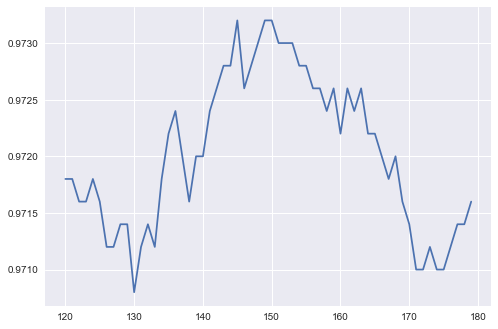

In [18]:
estimator = range(130,160)
etc_acc = []

for x in estimator:
    etc = ExtraTreesClassifier(n_estimators= x, random_state=10, n_jobs=-1)
    etc_model = etc.fit(X_train, Y_train)
    etc_acc.append(etc.score(X_test, Y_test))
    
max_etc_acc = max(etc_acc)
etc_index = etc_acc.index(max(etc_acc)) + 121
print('Max Accuracy of Extra Trees Classifier = ' + str(max_etc_acc*100) + '% for estimators = ' + str(etc_index))

plt.plot(estimator,etc_acc)
plt.grid(True)
plt.show()

In [19]:
from sklearn.metrics import classification_report

etc = ExtraTreesClassifier(n_estimators= etc_index, random_state=10, max_depth=None, n_jobs=-1)
etc_model = etc.fit(X_train, Y_train)
etc_predict = etc.predict(X_test)

report_etc = classification_report(Y_test, etc_predict, labels=None, target_names=None, sample_weight=None, digits=2)
print(report)

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       175
          1       0.88      0.98      0.93       204
          2       0.99      0.96      0.98       200
          3       0.86      0.96      0.91       205
          4       0.89      0.99      0.94       175
          5       0.86      0.98      0.91       185
          6       0.97      0.96      0.97       187
          7       0.90      0.90      0.90       178
          8       0.94      0.97      0.95       202
          9       0.96      0.90      0.93       173
         10       0.95      0.90      0.92       200
         11       0.99      0.96      0.98       187
         12       0.99      0.98      0.98       193
         13       0.97      0.96      0.96       189
         14       0.89      0.97      0.93       183
         15       0.99      0.87      0.92       186
         16       0.97      0.94      0.96       198
         17       0.96      0.91      0.93   

In [20]:
# CROSS VALIDATION
from sklearn.model_selection import cross_val_score
etc = ExtraTreesClassifier(n_estimators= etc_index, random_state=10, n_jobs=-1)
scores = cross_val_score(etc, X, y, cv=10)
print('Mean Accuracy:',np.mean(scores)*100,'%')

Mean Accuracy: 97.4354869865 %
